# Understanding Descriptive Statistics

Import the necessary libraries here:

In [35]:
# Libraries
import pandas as pd
import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [36]:
# your code here

def rolling_dice(num_of_rounds):
    dice_numbers = [1,2,3,4,5,6]
    dice_results = random.choices(dice_numbers, k=num_of_rounds)
    return dice_results

dice=pd.DataFrame(rolling_dice(10))
dice


,0
0,2
1,1
2,4
3,3
4,5
5,1
6,5
7,2
8,5
9,3


In [37]:
dice.reset_index(drop=False, inplace=True)
dice

,index,0
0,0,2
1,1,1
2,2,4
3,3,3
4,4,5
5,5,1
6,6,5
7,7,2
8,8,5
9,9,3


In [38]:
dice.rename(columns={"index": "round", 0: "result"}, inplace=True)

In [39]:
dice['round'] = dice['round'] + 1
dice

,round,result
0,1,2
1,2,1
2,3,4
3,4,3
4,5,5
5,6,1
6,7,5
7,8,2
8,9,5
9,10,3


#### 2.- Plot the results sorted by value.

In [40]:
dice.sort_values(by='result')['result'].value_counts()

5    3
1    2
2    2
3    2
4    1
Name: result, dtype: int64

<AxesSubplot: xlabel='result', ylabel='Count'>

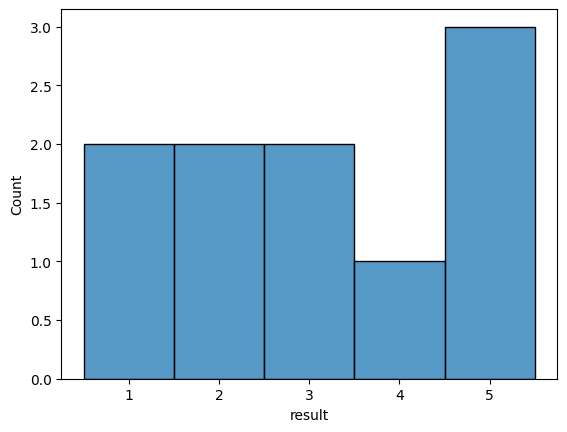

In [41]:
sns.histplot(dice['result'], discrete=True)

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [42]:
# your code here

dice.value_counts('result')


result
5    3
1    2
2    2
3    2
4    1
dtype: int64

<AxesSubplot: ylabel='Count'>

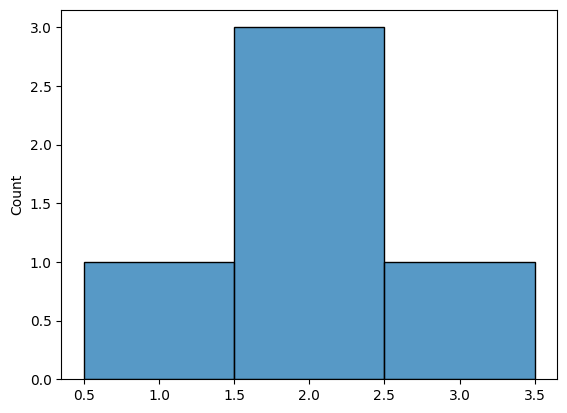

In [43]:
sns.histplot(dice.value_counts('result'), discrete=True)

In [44]:
"""
the plot above shows the frequency of the values
the plot below shows the frequency of the frequencies
"""

'\nthe plot above shows the frequency of the values\nthe plot below shows the frequency of the frequencies\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [45]:
# your code here

def calculate_mean(column):
    mean = column.sum() / len(column)
    return mean

In [46]:
calculate_mean(dice['result'])

3.1

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [47]:
# your code here



#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [48]:
# your code here

def median_value(l):
    srt = sorted(l)
    mid = len(l)/2
    if len(l) % 2:
            return srt[mid]
    else:
        med = (srt[mid] + srt[mid-1]) / 2  
        return med
# thanks to Padraic Cunningham on Stack Overflow

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [49]:
# your code here

    

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [50]:
# your code here
roll_the_dice_hundred = pd.read_csv('../data/roll_the_dice_hundred.csv')
roll_the_dice_hundred


,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6
...,...,...,...
95,95,95,4
96,96,96,6
97,97,97,1
98,98,98,3


<AxesSubplot: xlabel='value', ylabel='Count'>

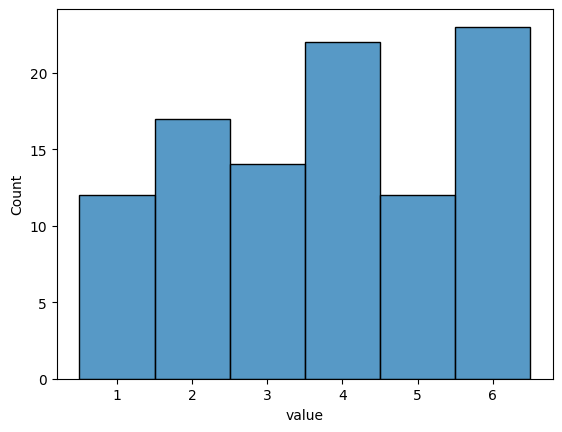

In [51]:
sns.histplot(roll_the_dice_hundred['value'], discrete=True)

In [52]:
"""
Most common results: 4 and 6
Least common result:
"""

'\nMost common results: 4 and 6\nLeast common result:\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [53]:
# your code here
calculate_mean(roll_the_dice_hundred['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [54]:
# your code here
roll_the_dice_hundred['value'].value_counts()

6    23
4    22
2    17
3    14
1    12
5    12
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

<AxesSubplot: xlabel='value', ylabel='Count'>

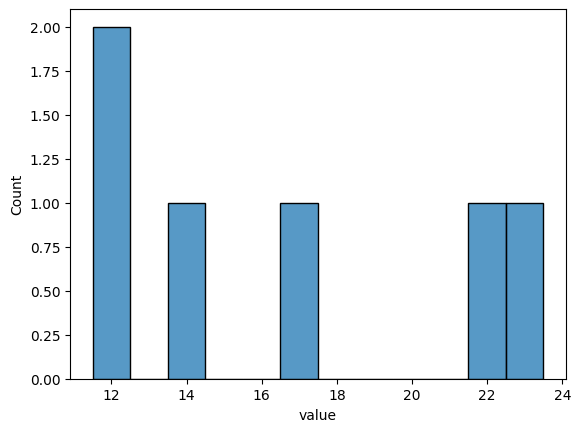

In [55]:
# your code here
sns.histplot(roll_the_dice_hundred['value'].value_counts(), discrete=True)



In [56]:
"""
your comments here
"""

'\nyour comments here\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

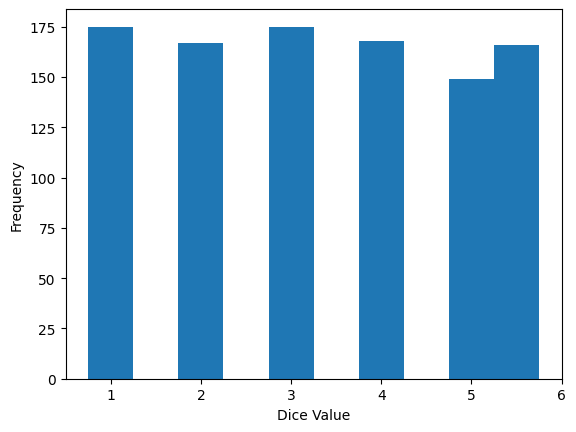

In [57]:
# your code here

roll_the_dice_k = pd.read_csv('../data/roll_the_dice_thousand.csv')

plt.hist(roll_the_dice_k['value'], align='left')
plt.xlabel('Dice Value')
plt.ylabel('Frequency')
plt.show()


<AxesSubplot: xlabel='value', ylabel='Count'>

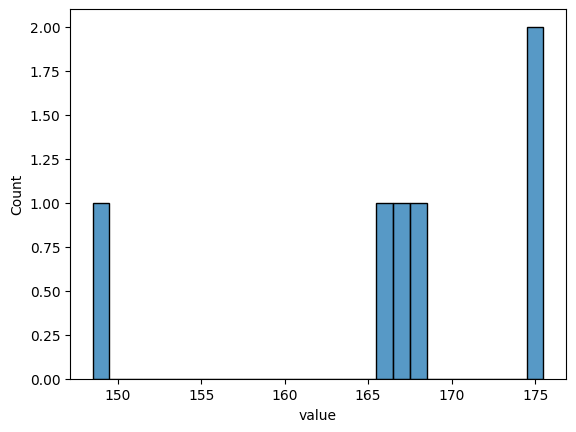

In [58]:
sns.histplot(roll_the_dice_k['value'].value_counts(), discrete=True)

In [59]:
"""
your comments here

frequency distribution looks more equal
"""

'\nyour comments here\n\nfrequency distribution looks more equal\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [70]:
# your code here

BCN_ages_population = pd.read_csv('../data/ages_population.csv')
BCN_ages_population

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
...,...
995,27.0
996,47.0
997,53.0
998,33.0


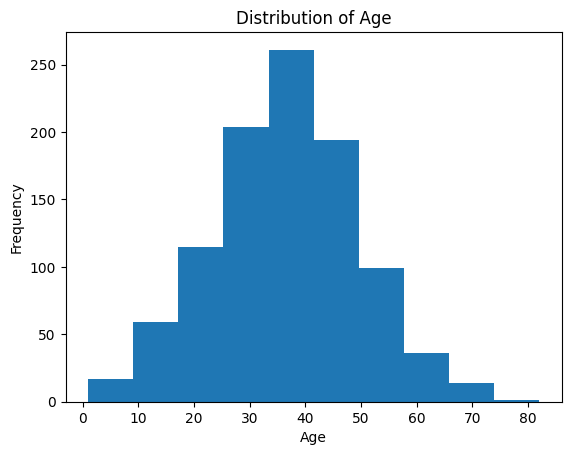

In [80]:
plt.hist(BCN_ages_population['observation'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

Mean will be around 40

Standard deviation around 

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [81]:
# your code here
BCN_ages_population['observation'].mean()

36.56

In [82]:
BCN_ages_population['observation'].std()

12.816499625976762

In [ ]:
"""
your comments here
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [84]:
# your code here

BCN_AP_2 = pd.read_csv('../data/ages_population2.csv')
BCN_AP_2.head()

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0


In [88]:
BCN_AP_2['observation'].value_counts()

28.0    139
27.0    125
26.0    120
29.0    115
25.0     98
30.0     90
24.0     78
31.0     61
23.0     41
22.0     35
32.0     31
33.0     22
21.0     17
20.0     13
34.0      7
19.0      3
35.0      3
36.0      2
Name: observation, dtype: int64

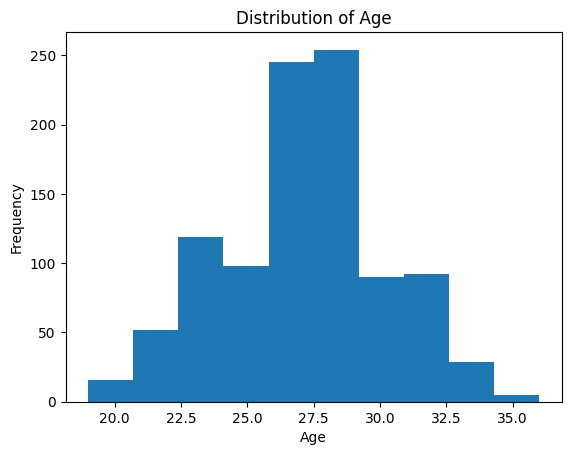

In [87]:
plt.hist(BCN_AP_2['observation'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

Why are there suddenly decimals in the labels on the x-axis?!? I used the same code as above, this is ridiculous!

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
The first one looks more like normal ditribution. This one looks like a middle finger. 
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [92]:
# your code here

BCN_AP_2['observation'].mean()

27.155

In [93]:
BCN_AP_2['observation'].std()

2.969813932689186

In [ ]:
"""
Lower standard deviation indicates that the data is less spread and closer to the mean
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [94]:
# your code here

BCN_AP_3 = pd.read_csv('../data/ages_population3.csv')

In [96]:
BCN_AP_3['observation'].value_counts()

32.0    37
35.0    31
37.0    31
39.0    29
36.0    26
        ..
76.0     1
8.0      1
9.0      1
1.0      1
7.0      1
Name: observation, Length: 75, dtype: int64

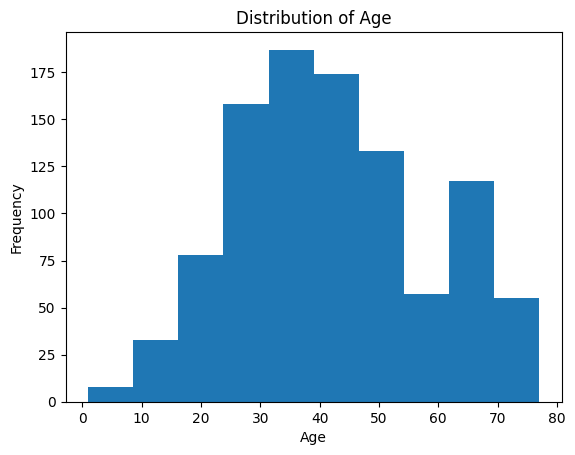

In [97]:
plt.hist(BCN_AP_3['observation'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [98]:
# your code here
BCN_AP_3['observation'].mean()

41.989

In [99]:
BCN_AP_3['observation'].std()

16.144705959865934

In [ ]:
"""
Highest mean means the population here is on average older than the other two neighborhoods
Std of 16 means it has the highest dispersion (spread furthest) from the mean
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [101]:
# your code here

q1 = BCN_AP_3['observation'].quantile(0.25)
q2 = BCN_AP_3['observation'].quantile(0.50) #median
q3 = BCN_AP_3['observation'].quantile(0.75)
q4 = BCN_AP_3['observation'].quantile(1.0) #maximum 

print("Q1:", q1)
print("Q2 (Median):", q2)
print("Q3:", q3)
print("Q4 (Max):", q4)
print("The difference between the median and the mean is:", BCN_AP_3['observation'].mean() - q2)


Q1: 30.0
Q2 (Median): 40.0
Q3: 53.0
Q4 (Max): 77.0
The difference between the median and the mean is: 1.9889999999999972


In [ ]:
"""
your comments here
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""